In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
torch.cuda.is_available()

True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
(path/'testing').ls()

(#10) [Path('testing/2'),Path('testing/3'),Path('testing/9'),Path('testing/4'),Path('testing/0'),Path('testing/5'),Path('testing/6'),Path('testing/1'),Path('testing/8'),Path('testing/7')]

In [130]:
def get_dls(path, bs, size):
  mnist = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2, do_flip=False, pad_mode='zeros', min_zoom=0.6, max_zoom=1.5)
  )
  return mnist.dataloaders(path, bs=bs)

In [119]:
aug_transforms?

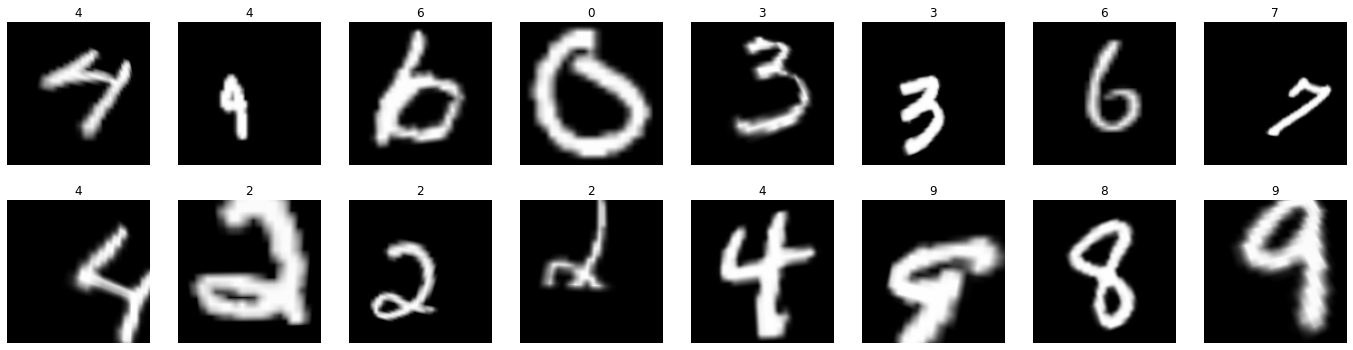

In [132]:
dls = get_dls((path), 64, 56)
dls.train.show_batch(max_n=16, nrows=2, ncols=8)

(256, 256)


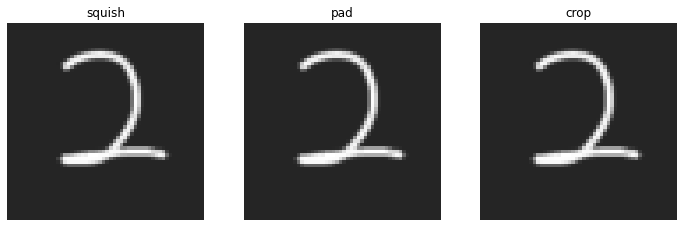

In [46]:
# Checking Resizing on input images, feel free to skip.

img = Image.open('/content/drive/My Drive/lol.jpg').convert('RGB')
print(img.shape)
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(56, method=method)
    show_image(rsz(img, split_idx=0), ctx=ax, title=method);

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=1.9054607491852948e-06)

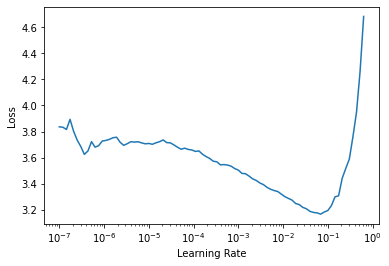

In [133]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.lr_find()

In [134]:
# 1 epoch for demonstration
dls = get_dls((path), 64, 56)
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.fit_one_cycle(5, wd=0.1, lr=5e-3)

dls = get_dls((path), 64, 128)
learn.dls = dls
learn.fit_one_cycle(8, wd=0.1, lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.341094,0.166865,0.946786,01:55
1,0.170509,0.125458,0.959714,01:52
2,0.105223,0.032694,0.990571,01:53
3,0.068395,0.021633,0.993929,01:53
4,0.050016,0.018487,0.994714,01:53


epoch,train_loss,valid_loss,accuracy,time
0,0.069454,0.029593,0.991429,01:52
1,0.115913,0.044209,0.986714,01:52
2,0.089465,0.028415,0.991857,01:52
3,0.068705,0.023672,0.992143,01:53
4,0.062979,0.020521,0.992929,01:52
5,0.049688,0.015337,0.995357,01:52
6,0.035774,0.013473,0.995571,01:52
7,0.037456,0.012807,0.996071,01:52


In [136]:
learn.export(fname='mnist_resnet18_2.pkl')

In [135]:
pred = learn.predict('/content/drive/My Drive/lol.jpg')
pred

('2',
 tensor(2),
 tensor([2.5244e-06, 5.5039e-05, 9.9971e-01, 1.9565e-04, 8.4394e-07, 1.8889e-05,
         2.6777e-06, 8.4165e-06, 8.2106e-07, 4.4669e-07]))